Подклчение к базе данных **pivo_commets**

In [138]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
from psycopg2 import OperationalError

def create_connection(db_name, db_user, db_password, db_host, db_port):
    connection = None
    try:
        connection = psycopg2.connect(
            database=db_name,
            user=db_user,
            password=db_password,
            host=db_host,
            port=db_port
        )
        print("Соединение с базой данных успешно установлено")
    except OperationalError as e:
        print(f"Произошла ошибка '{e}'")
    return connection

def fetch_data_and_save_to_file(engine, file_path, table_name, schema="public"):
    # Используйте with блок для создания соединения
    with engine.connect() as connection:
        # SQL-запрос для выборки данных из указанной таблицы и схемы
        sql_query = f"SELECT * FROM {schema}.{table_name};"
        # Выполняем SQL-запрос и получаем результат в виде DataFrame
        df = pd.read_sql(sql_query, connection)

        # Записываем DataFrame в файл
        df.to_csv(file_path, index=False)
        print(f"Данные сохранены в файл {file_path}")

# Задайте параметры подключения к базе данных
db_params = {
    "db_name": "pivo_commets",
    "db_user": "postgres",
    "db_password": "1111",
    "db_host": "127.0.0.1",
    "db_port": "5432"
}
# Задайте путь к файлу, в который будут сохраняться данные
file_path = "comments_train.csv"

# Задайте имя конкретной таблицы в базе данных
table_name = "beer_comments"

# Создайте соединение с базой данных
conn = create_connection(**db_params)
cursor = conn.cursor()

# Создайте строку подключения SQLAlchemy
db_uri = f"postgresql://{db_params['db_user']}:{db_params['db_password']}@{db_params['db_host']}:{db_params['db_port']}/{db_params['db_name']}"
# Создайте движок SQLAlchemy
engine = create_engine(db_uri)

try:
    # Вызываем функцию для извлечения данных и сохранения их в файл
    fetch_data_and_save_to_file(engine, file_path, table_name)

except KeyboardInterrupt:
    print("Скрипт завершен")
finally:
    # Закрываем соединение с базой данных
    cursor.close()
    conn.close()

Соединение с базой данных успешно установлено
Данные сохранены в файл comments_train.csv


In [139]:
comments_train = pd.read_csv(r"F:\beeeer\base\comments_train.csv")
comments_train

,id,text,beer_rating
0,1,"После просмотра этой дорамы я впервые подумал,...",9.0
1,2,"Алкоголь в этой дораме – не просто напиток, а ...",8.0
2,3,Главные герои этой дорамы – настоящие ценители...,9.5
3,4,Пивная тема в этой дораме раскрыта на высшем у...,9.0
4,5,Эта дорама – настоящая ржачка! Персонажи знают...,8.5
...,...,...,...
196,235,"Всей команде спасибо, давно не смотрела русски...",4.0
197,236,Монтаж кто делал? - Глухие? Почему голоса еле ...,1.0
198,237,"Четкий нет слов, странно что оценка на кинопои...",5.0
199,238,Очень классный фильм! :-),7.0


In [140]:
import plotly.express as px

def plot_continious_hist(data, feature, hue=None, bins=100, figsize=(800, 500)):
    if hue is not None:
        data = data.sort_values(by=hue)
        
    hist_fig = px.histogram(
        data,
        x=feature,
        color=hue if hue is not None else None,
        nbins=bins,
        marginal="box",
        opacity=0.8)
    hist_fig.update_layout(
        title=f"{feature} distribution",
        plot_bgcolor='white',
        bargap=0.2,
        width=figsize[0],
        height=figsize[1],
        yaxis_title='Amount')
    
    hist_fig.show()

In [141]:
comments_train["utterance_length"] = comments_train["text"].replace(" ", "").apply(lambda x: len(x))

plot_continious_hist(comments_train, "utterance_length")
comments_train["utterance_length"].describe()

count     201.000000
mean      165.835821
std       164.809581
min        19.000000
25%        95.000000
50%       142.000000
75%       187.000000
max      1851.000000
Name: utterance_length, dtype: float64

In [142]:
comments_train

,id,text,beer_rating,utterance_length
0,1,"После просмотра этой дорамы я впервые подумал,...",9.0,157
1,2,"Алкоголь в этой дораме – не просто напиток, а ...",8.0,139
2,3,Главные герои этой дорамы – настоящие ценители...,9.5,142
3,4,Пивная тема в этой дораме раскрыта на высшем у...,9.0,157
4,5,Эта дорама – настоящая ржачка! Персонажи знают...,8.5,130
...,...,...,...,...
196,235,"Всей команде спасибо, давно не смотрела русски...",4.0,99
197,236,Монтаж кто делал? - Глухие? Почему голоса еле ...,1.0,95
198,237,"Четкий нет слов, странно что оценка на кинопои...",5.0,62
199,238,Очень классный фильм! :-),7.0,25


In [143]:
bottom_rows = comments_train.nsmallest(5, 'utterance_length')
comments_train = comments_train.drop(bottom_rows.index)

print(comments_train)


      id                                               text  beer_rating  \
0      1  После просмотра этой дорамы я впервые подумал,...          9.0   
1      2  Алкоголь в этой дораме – не просто напиток, а ...          8.0   
2      3  Главные герои этой дорамы – настоящие ценители...          9.5   
3      4  Пивная тема в этой дораме раскрыта на высшем у...          9.0   
4      5  Эта дорама – настоящая ржачка! Персонажи знают...          8.5   
..   ...                                                ...          ...   
196  235  Всей команде спасибо, давно не смотрела русски...          4.0   
197  236  Монтаж кто делал? - Глухие? Почему голоса еле ...          1.0   
198  237  Четкий нет слов, странно что оценка на кинопои...          5.0   
199  238                          Очень классный фильм! :-)          7.0   
200  239              Очень понравился и посмеялись от души          8.0   

     utterance_length  
0                 157  
1                 139  
2              

In [144]:
import emoji
import re
import pandas as pd

def remove_emoji(input_text):
    cleaned_text = re.sub(r'(:[^:\s]+:|[\U00010000-\U0010ffff])', '', input_text)
    return cleaned_text

# Применяем функцию remove_emoji к каждой ячейке в DataFrame
comments_train_copy = comments_train.applymap(lambda x: remove_emoji(str(x)))


In [145]:
plot_continious_hist(comments_train, "utterance_length")
comments_train["utterance_length"].describe()

count     196.000000
mean      169.494898
std       165.280228
min        25.000000
25%        99.750000
50%       143.500000
75%       193.750000
max      1851.000000
Name: utterance_length, dtype: float64

Токенизация колонки text

In [146]:
import torch

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", DEVICE)


Device: cpu


In [147]:
from transformers import TFBertModel, BertTokenizer

bert_model = TFBertModel.from_pretrained(
    "DeepPavlov/rubert-base-cased",
    from_pt=True,
    output_hidden_states=True
)

tokenizer = BertTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the 

In [148]:
def extract_text_vectors(df, column, model, tokenizer,
                         device, verbose=True, verbose_interval=100):
    df = df.copy()
    model = model.to(device)
    if verbose:
        start = time.time()
        total_images = df.shape[0]
        _ = 0

    vectors = []
    for index, row in df.reset_index(drop=True).iterrows():
        index += 1
        text = row[column]
        input_ids = torch.tensor(
            [tokenizer.encode(text, add_special_tokens=True)]).to(device)
        with torch.no_grad():
            model_output = model(input_ids)
        vectors.append(
            model_output.last_hidden_state.mean(dim=1).squeeze().tolist())

        if verbose and (index % verbose_interval == 0 or index == total_images - 1):
            print(f"{_}. Processed text {index}/{total_images}.")
            _ += 1

    assert all(len(vector) == len(vectors[0]) for vector in vectors), "Text vectors have different dimensions"

    vectors_np = np.array(vectors)
    df[[f"text_vector_el{x}"
        for x in range(len(vectors_np[0]))]] = vectors_np

    if verbose:
        end = time.time()
        print(f"Extraction completed successfully. {exec_time(start, end)}\n")

    return df


In [149]:
bert_model

In [150]:
import tensorflow as tf

def vectorize_comment(comment_text):
    # Токенизация текста
    tokens = tokenizer(comment_text, return_tensors="tf", padding=True, truncation=True, max_length=256)
    
    # Получение эмбеддингов из модели
    outputs = bert_model(tokens['input_ids'])
    last_hidden_states = outputs.last_hidden_state
    
    # Предполагая, что вы хотите использовать среднее значение эмбеддингов в качестве векторного представления
    vector = tf.reduce_mean(last_hidden_states, axis=1).numpy()

    return vector


In [151]:
comments_train["vectorized_comment"] = comments_train["text"].apply(vectorize_comment)

In [152]:
comments_train

,id,text,beer_rating,utterance_length,vectorized_comment
0,1,"После просмотра этой дорамы я впервые подумал,...",9.0,157,"[[0.025300974, -0.4715072, 0.33574465, 0.04139..."
1,2,"Алкоголь в этой дораме – не просто напиток, а ...",8.0,139,"[[0.2623996, -0.35179248, -0.044964865, -0.047..."
2,3,Главные герои этой дорамы – настоящие ценители...,9.5,142,"[[0.01868856, -0.40090492, -0.14417881, 0.0273..."
3,4,Пивная тема в этой дораме раскрыта на высшем у...,9.0,157,"[[0.11453666, -0.263768, 0.10124293, 0.0096111..."
4,5,Эта дорама – настоящая ржачка! Персонажи знают...,8.5,130,"[[0.11017729, -0.09534927, -0.26619008, 0.2055..."
...,...,...,...,...,...
196,235,"Всей команде спасибо, давно не смотрела русски...",4.0,99,"[[0.22772168, -0.20732398, -0.20218511, 0.2710..."
197,236,Монтаж кто делал? - Глухие? Почему голоса еле ...,1.0,95,"[[-0.034144547, -0.17292538, 0.020324772, -0.1..."
198,237,"Четкий нет слов, странно что оценка на кинопои...",5.0,62,"[[0.0084604025, -0.06046022, 0.28788966, 0.318..."
199,238,Очень классный фильм! :-),7.0,25,"[[-0.3950797, -0.53413254, -0.7722926, 0.53286..."


In [153]:
comments_train['vectorized_comment_rating'] = comments_train.apply(lambda row: np.multiply(row['vectorized_comment'], row['beer_rating']), axis=1)

In [154]:
comments_train["beer_rating"] = pd.to_numeric(comments_train["beer_rating"], errors="coerce")

In [155]:
comments_train

,id,text,beer_rating,utterance_length,vectorized_comment,vectorized_comment_rating
0,1,"После просмотра этой дорамы я впервые подумал,...",9.0,157,"[[0.025300974, -0.4715072, 0.33574465, 0.04139...","[[0.22770877, -4.2435646, 3.0217018, 0.3725513..."
1,2,"Алкоголь в этой дораме – не просто напиток, а ...",8.0,139,"[[0.2623996, -0.35179248, -0.044964865, -0.047...","[[2.099197, -2.8143399, -0.35971892, -0.380521..."
2,3,Главные герои этой дорамы – настоящие ценители...,9.5,142,"[[0.01868856, -0.40090492, -0.14417881, 0.0273...","[[0.17754132, -3.8085968, -1.3696986, 0.259859..."
3,4,Пивная тема в этой дораме раскрыта на высшем у...,9.0,157,"[[0.11453666, -0.263768, 0.10124293, 0.0096111...","[[1.0308299, -2.3739119, 0.91118634, 0.0865005..."
4,5,Эта дорама – настоящая ржачка! Персонажи знают...,8.5,130,"[[0.11017729, -0.09534927, -0.26619008, 0.2055...","[[0.936507, -0.8104688, -2.2626157, 1.7473325,..."
...,...,...,...,...,...,...
196,235,"Всей команде спасибо, давно не смотрела русски...",4.0,99,"[[0.22772168, -0.20732398, -0.20218511, 0.2710...","[[0.9108867, -0.82929593, -0.80874044, 1.08426..."
197,236,Монтаж кто делал? - Глухие? Почему голоса еле ...,1.0,95,"[[-0.034144547, -0.17292538, 0.020324772, -0.1...","[[-0.034144547, -0.17292538, 0.020324772, -0.1..."
198,237,"Четкий нет слов, странно что оценка на кинопои...",5.0,62,"[[0.0084604025, -0.06046022, 0.28788966, 0.318...","[[0.042302012, -0.3023011, 1.4394484, 1.592633..."
199,238,Очень классный фильм! :-),7.0,25,"[[-0.3950797, -0.53413254, -0.7722926, 0.53286...","[[-2.765558, -3.7389278, -5.4060483, 3.7300203..."


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

train_data, test_data, train_labels, test_labels = train_test_split(
    comments_train["vectorized_comment"].tolist(),
    comments_train["beer_rating"].tolist(),
    test_size=0.2,
    random_state=42
)

# Усреднение векторов по всему seq_length
train_data_flat = np.mean(train_data, axis=1).tolist()
test_data_flat = np.mean(test_data, axis=1).tolist()

model = LinearRegression()
model.fit(train_data_flat, train_labels)
predicted_labels = model.predict(test_data_flat)

# Оцените качество модели с использованием среднеквадратичной ошибки
mse = mean_squared_error(test_labels, predicted_labels)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(test_labels, predicted_labels)
print(f"R^2 Score: {r2}")


Mean Squared Error: 8.138875165994722
R^2 Score: 0.1096199317359644


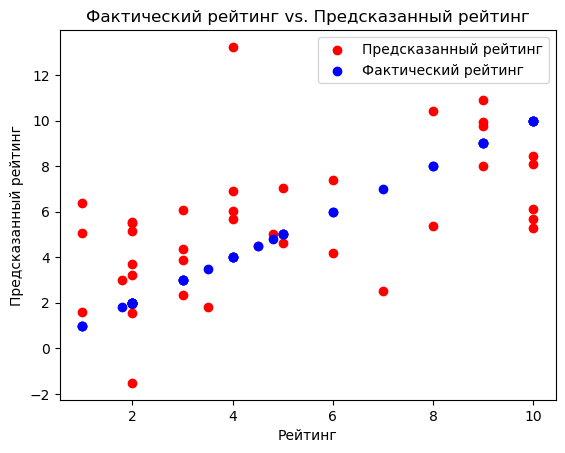

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(test_labels, predicted_labels, color='red', label='Предсказанный рейтинг')
plt.scatter(test_labels, test_labels, color='blue', label='Фактический рейтинг')
plt.xlabel('Рейтинг')
plt.ylabel('Предсказанный рейтинг')
plt.title('Фактический рейтинг vs. Предсказанный рейтинг')
plt.legend()
plt.show()


In [ ]:
new_comment = "хуйня а не фильм"

# Векторизация нового комментария
vectorized_new_comment = vectorize_comment(new_comment)

# Предсказание рейтинга для нового комментария
predicted_rating = model.predict(vectorized_new_comment)

print(f"Predicted Rating: {predicted_rating[0]}")

Predicted Rating: 5.0646211276468645


In [ ]:
weights = model.coef_
print(weights)


[ 1.39523642e-01  2.52034265e-01 -6.39458126e-01 -1.09609405e-01
 -4.93195310e-01  9.06972354e-02 -2.16104709e-01 -2.35702342e-01
  1.40389854e-01  6.40783211e-01  1.79813971e-02  3.19355884e-01
 -4.42021850e-02 -2.42419955e-01  6.04406036e-01 -1.04827960e-01
  6.45941030e-01  2.17765420e-02  1.07599551e-01 -4.35996262e-02
  5.02318560e-01 -3.45714788e-01 -6.61418363e-01 -3.49525035e-01
  2.02399140e-01 -1.99242055e-01 -3.10331323e-01 -4.66461345e-01
 -5.76402843e-01  2.54029199e-01  1.00345710e-01 -7.64331364e-04
 -3.42982744e-01  5.65732371e-01 -1.06597583e-01 -2.11800615e-01
  9.04901367e-01 -2.52582871e-01 -4.11001120e-01 -2.92226712e-01
 -3.78426835e-01 -4.52092844e-02 -2.14573724e-01  5.77281213e-01
 -1.11509435e-01  4.86534359e-01 -3.61495095e-01 -2.97614869e-01
 -2.14777268e-01 -1.92999398e-02  4.59127019e-01  2.87614281e-02
  1.13142525e-01  2.04765866e-01  4.70991039e-02  4.88787257e-01
 -5.36459157e-01 -2.09617795e-02  2.86299766e-02 -1.78935670e-01
  1.48454691e-01  6.79586